In [1]:
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image
import os
from pathlib import Path

In [2]:
class LogisticsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = Path(root_dir)
        self.transform = transform
        # Ambil semua file .jpg
        self.image_files = sorted(list(self.root_dir.glob("*.jpg")))
        
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        # Ambil label dari file .txt yang sesuai
        txt_path = img_path.with_suffix('.txt')
        label = None
        if txt_path.exists():
            with open(txt_path, 'r') as f:
                label = f.read().strip()
        
        return image, label, str(img_path.name)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = LogisticsDataset(
    root_dir="../data/IMG_VALID",
    transform=transform
)

print(f"Number of samples in dataset: {len(dataset)}")
print(f"Sample: {dataset[0][2]}")

Number of samples in dataset: 947
Sample: 100_20220305T015241760Z_s00.mp4_23800.jpg


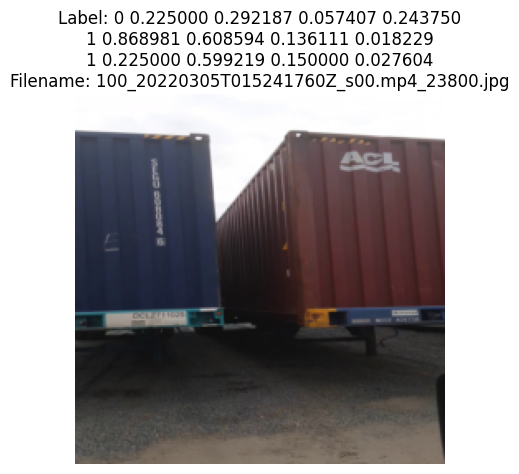

In [3]:
# Show a sample image
import matplotlib.pyplot as plt
image, label, filename = dataset[0]
plt.imshow(image.permute(1, 2, 0))
plt.title(f"Label: {label}\nFilename: {filename}")
plt.axis('off')
plt.show()